In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from cycler import cycler
import yaml

In [2]:
#%% Plotting parameters

DPI_SAVE = 600
DPI_PLOT = 150
# typical one column figure width
FIG_WIDTH = 3.4 #8.636 cm

In [3]:
# load style

plt.style.use('./pv-textbook_inigo.mplstyle')

In [4]:
# load colors

with open('./colors.yaml') as f:
    content = f.read()
    print (content)

colors = {}
yaml_file = open("./colors.yaml", 'r')
yaml_content = yaml.safe_load(yaml_file)
for key, value in yaml_content.items():
    colors[key] = value

colorlist = [colors[key] for key in colors]
plt.rcParams['axes.prop_cycle'] = cycler(color=colorlist)

# Default colors for the book "Fundamentals of Solar Cells 
# and Photovoltaic Systems Engineering"

color1 : '#5FA1D8' #ligthblue
color2 : '#B31F20' #darkred
color3 : '#498F34' #green
color4 : '#EBD741' #darkyellow
color5 : '#F18B45' #orange
color6 : '#002060' #darkblue
color7 : '#55B99D' #turqoise
color8 : '#BDC554' #yellowgreen
color9 : '#4472C4' #blue
color10 : '#B9DEF3' #verylightblue
color11 : 'black'  #black
color12 : '#BDBDBD' #lightgray
color13 : '#696969' #gray
color14 : '#CD853F' #brown
color15 : '#FF7F50' #lightpink


In [5]:
am15g=pd.read_excel('./data/astmg173.xls', sheet_name='SMARTS2')
am15g=(np.array(am15g['Wvlgth nm']), np.array(am15g['Global tilt W*m-2*nm-1']))

Xe_lamp=pd.read_excel('./data/Xe_arc_lamp.xlsx', sheet_name='Xe_arc_lamp')
Xe_lamp=(np.array(Xe_lamp['nm']), np.array(Xe_lamp['Xe arc lamp']))

Quartz_W=pd.read_excel('./data/Quartz_W_halogen_lamp.xlsx', sheet_name='Quartz_W_halogen_lamp')
Quartz_W=(np.array(Quartz_W['nm']), np.array(Quartz_W['Quartz W halogen lamp']))

SR_Si=pd.read_excel('./data/SR_Si.xlsx', sheet_name='SR_Si')
SR_Si=(np.array(SR_Si['nm']), np.array(SR_Si['SR Si']))

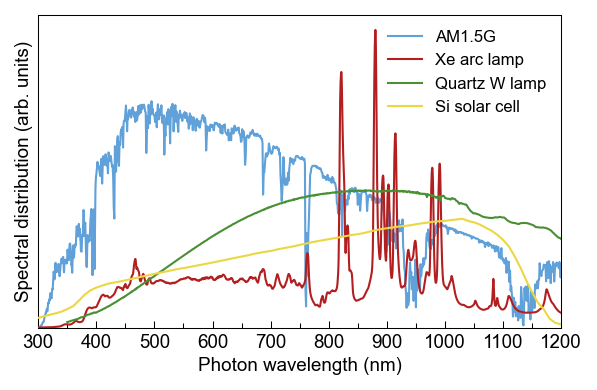

In [9]:
fig = plt.figure(figsize=(1.2*FIG_WIDTH, 2.7), dpi=DPI_PLOT)
ax = fig.add_subplot(111)

lw=1

ax.plot(am15g[0], am15g[1], c=colors['color1'], lw=lw, zorder=3, label='AM1.5G')

ax.plot(Xe_lamp[0], Xe_lamp[1], c=colors['color2'], lw=lw, zorder=3, label='Xe arc lamp')

ax.plot(Quartz_W[0], Quartz_W[1], c=colors['color3'], lw=lw, zorder=3, label='Quartz W lamp')

ax.plot(SR_Si[0], SR_Si[1], c=colors['color4'], lw=lw, zorder=3, label='Si solar cell')

ax.set_xlim(300,1200)
ax.set_ylim(0,None)
ax.set_xlabel('Photon wavelength (nm)')
ax.set_ylabel('Spectral distribution (arb. units)')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.set(yticklabels=[])  # remove the tick labels
ax.set_yticks([]) # remove the ticks

plt.tight_layout()

plt.legend()

plt.savefig ('./spectral_sensitivity.png', dpi=DPI_SAVE)